In [29]:
library("Rmisc")
library("ggplot2")

In [30]:
SEED <- 346
M <- 1100
LAMBDA <- 0.45
LAMBDA_OUTLIERS <- 0.01
PERCENT_CONTAMINATED <- 0.20
CONF_LEVEL <- 0.999

In [31]:
set.seed(SEED)

In [32]:
df <- data.frame()
for (n in seq(from = 100, to = 2500, by = 100)) {
  n_contaminated <- floor(n * PERCENT_CONTAMINATED)
  amplitude <- c()
  amplitude_contaminated <- c()
  for (i in 1:M) {
    samples <- rexp(n, rate = LAMBDA)
    samples_outliers <- rexp(n_contaminated, rate = LAMBDA_OUTLIERS)
    samples_contaminated <- c(samples_outliers[0:n_contaminated],
                              samples[n_contaminated:length(samples)])
    conf_interval <- CI(samples, ci = CONF_LEVEL)
    conf_interval_contaminated <- CI(samples_contaminated, ci = CONF_LEVEL)
    amplitude <- append(amplitude,
      c(abs(conf_interval[["upper"]] - conf_interval[["lower"]])))
    amplitude_contaminated <- append(amplitude_contaminated,
      c(abs(conf_interval_contaminated[["upper"]]
              - conf_interval_contaminated[["lower"]])))
  }
  mean_amplitude <- mean(amplitude)
  mean_amplitude_contaminated <- mean(amplitude_contaminated)

  df <- rbind(df, data.frame(n = c(n, n),
        amplitude = c(mean_amplitude, mean_amplitude_contaminated),
        type = c("Não Contaminado", "Contaminado")
  ))
}

df

n,amplitude,type
<dbl>,<dbl>,<chr>
100,1.4908319,Não Contaminado
100,39.1740377,Contaminado
200,1.0463210,Não Contaminado
200,27.5677317,Contaminado
300,0.8470831,Não Contaminado
300,22.7732076,Contaminado
400,0.7336991,Não Contaminado
400,19.5809611,Contaminado
500,0.6558256,Não Contaminado


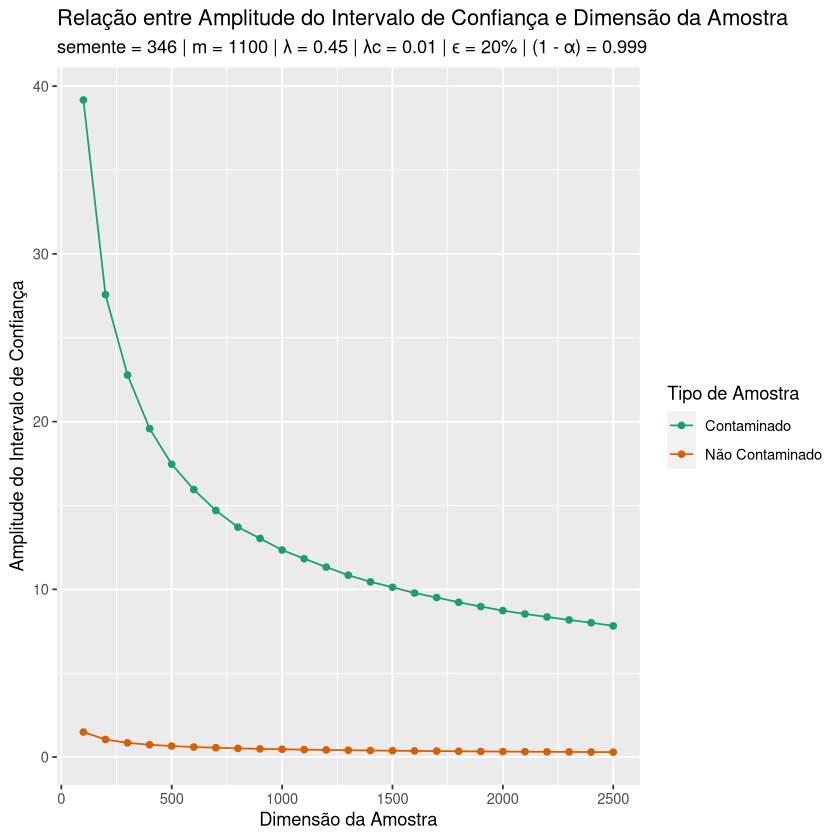

In [33]:
ggplot(df, aes(x = n, y = amplitude, color = type)) +
  geom_line() +
  geom_point() +
  scale_color_brewer(palette = "Dark2") +
  xlab("Dimensão da Amostra") +
  ylab("Amplitude do Intervalo de Confiança") +
  labs(title = "Relação entre Amplitude do Intervalo de Confiança e Dimensão da Amostra",
    color = "Tipo de Amostra",
    subtitle = sprintf("semente = %d | m = %d | λ = %.2f | λc = %.2f | ϵ = %.0f%% | (1 - α) = %.3f",
      SEED, M, LAMBDA, LAMBDA_OUTLIERS, PERCENT_CONTAMINATED * 100, CONF_LEVEL))

In [34]:
ggsave("output.svg", width = 20, height = 14.5, units = "cm")

Através do gráfico obtido, conseguimos concluir que quanto maior a dimensão da amostra
menor será a amplitude do intervalo de confiança. A relação entre estas duas variáveis
é inversamente proporcional.
Podemos também analisar consoante o tipo da amostra: as amostras contaminadas apresentam
uma amplitude do intervalo de confiança muito maior do que as amostras não contaminadas,
especialmente para dimensões mais pequenas.